<a href="https://colab.research.google.com/github/paliwalpiyush151/Molecular_Simulations/blob/main/Copy_of_MiniProject_3_LJ_Fluid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Mini Project-3**
## Name : Piyush Paliwal
## Roll Number: 17180


## Computing Equation of state of LJ fluid at T = 2.0   (P Vs $\rho$)  for system with N = 100

In [ ]:
# Steps of Lenard Jones Fluid Simulations:

# initialization

def initialize(rx,ry,rz,n,L):
  n3 =2
  while(pow(n3,3) < n):
    n3+=1

  ix,iy,iz = 0,0,0
  for i in range(n):
    rx[i] = (1.0*ix+0.5)*L/n3
    ry[i] = (1.0*iy+0.5)*L/n3
    rz[i] = (1.0*iz+0.5)*L/n3
    ix+=1
    if(ix==n3):
      ix =0
      iy+=1
      if (iy==n3):
        iy =0
        iz+=1

In [ ]:
N = 100
T = 2.0
rho = 0.5
rx = list()
ry = list()
rz = list()

for i in range(N):
  rx.append(0)
  ry.append(0)
  rz.append(0)

L = pow(N/rho,0.33333)
initialize(rx,ry,rz,N,L)

In [ ]:
print('Initial position of particles')
import plotly.express as px
fig = px.scatter_3d(x=rx, y=ry, z=rz)
fig.show()

Initial position of particles


In [ ]:
# Calculate energy of given configuration: 
def total_energy(rx,ry,rz,N,L,rc2,tail_cor,enr_cor,shift,e_cut):
  enr = 0.0
  lh = L/2.0
  vir = 0.0
  
  for i in range(N-1):
    for j in range(i+1,N):
      dx = (rx[i]-rx[j])
      dy = (ry[i]-ry[j])
      dz = (rz[i]-rz[j])
# Minimun Image convention 
      if (dx>lh):
        dx-=L
      elif (dx<-lh):
        dx+=L
      if (dy > lh):
        dy-=L
      elif (dy<-lh):
        dy+=L
      if (dz>lh):
        dz-=L
      elif (dz<-lh):
        dz+=L

      r2 = dx*dx+dy*dy+dz*dz
      rc = L/2.0
      
      if (r2<rc2):        # What about equilibrium distance?
        ir6 = 1.0/(r2*r2*r2)
        enr += 4*((ir6*ir6)-ir6) - 4*((pow(rc,-12))-pow(rc,-6))    #e_cut if shift else 0.0
        vir += 48*((ir6*ir6)-0.5*ir6)

  return enr + N*enr_cor if tail_cor else 0.0, vir

###(A) At T = 2.0 , $\rho$ = 0.3 : Plot  of Pressure Vs Montecarlo steps & energy Vs Monte Carlo steps

In [ ]:
## main program
import math
import random

rho,T,N = 0.3, 2.0,100
nCycles,nEq,shift,short_out,tailcorr = 10,1000,1,0,1

# compute side length
L = pow(N/rho,0.33333)
rc = L/2.0

# compute tail corrections:
rr3 = pow(rc,-3)
e_cor = 8*(math.pi)*rho*(pow(rr3,3)/9.0 - rr3/3.0)
p_cor = (16/3.0)*(math.pi)*rho*rho*((2/3)*pow(rr3,3) - rr3)
e_cut = 4.0*(pow(rr3,4) - pow(rr3,2))
V = pow(L,3)
# squared cutoff 
rc2 = rc*rc
rx = list()
ry = list()
rz = list()

for i in range(N):
  rx.append(0)
  ry.append(0)
  rz.append(0)

initialize(rx,ry,rz,N,L)

E_old,vir = total_energy(rx,ry,rz,N,L,rc2,tailcorr,e_cor,shift,e_cut)

In [ ]:
from random import random as ran
import random 
import math

dr = 0.1
energy_mc = list()
press_mc = list()
Eq_steps = list()
accuracy = list() 
e_evol = list()
v_evol = list()

for i in range(5,60):
  Eq_steps.append(i*100)
  
for j in range(len(Eq_steps)):
  nCycles = 10
  nCycles += Eq_steps[j]
  nAcc = 0.0
  esum = 0.0
  nSamp = 0.0
  vir_sum = 0.0
  for c in range(nCycles):
    i = random.randint(0,99)
    #random.seed(c)
    dx = dr*(0.5-random.random())
    dy = dr*(0.5-random.random())
    dz = dr*(0.5-random.random())

    # Saving current positions :
    rxold = rx[i]
    ryold = ry[i]
    rzold = rz[i]

    # Displace a particle
    rx[i]+=dx
    ry[i]+=dy
    rz[i]+=dz

    # Apply periodic boundary conditions : 
    if (rx[i]>L): 
      rx[i]-=L
    if (rx[i]<0):
      rx[i]+=L
    if (ry[i]>L):
      ry[i]-=L
    if (ry[i]<0):
      ry[i]+=L
    if (rz[i]>L):
      rz[i]-=L
    if (rz[i]<0):
      rz[i]+=L

    rc2 = (L*L)/4.0
    E_new,vir_new = total_energy(rx,ry,rz,N,L,rc2,tailcorr,e_cor,shift,e_cut)
    
    # Conditionally accept
    if (random.random() < math.exp(-T*(E_new - E_old))):
      E_old= E_new
      vir_old = vir_new
      nAcc+=1 
    # Or Reject the move 
    else :
      rx[i] = rxold
      ry[i] = ryold
      rz[i] = rzold
  # start calculating energy after equilibration steps.
    if (c == Eq_steps[j]):
      energy_mc.append(E_old)
      P = rho/T + vir_old/(3*V) 
      press_mc.append(P)
    if (c > nEq): 
      e_evol.append(E_old)
      v_evol.append(rho*T + vir_old/(3*V))
      esum +=E_old
      vir_sum += vir_old
      nSamp+=1
  accuracy.append(nAcc/nCycles)

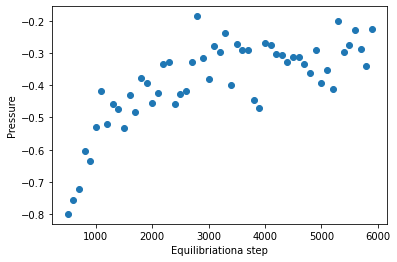

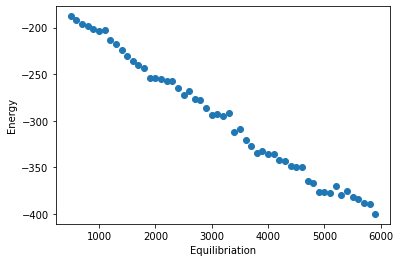

In [ ]:
import matplotlib.pyplot as plt

y = press_mc
x = Eq_steps
plt.scatter(x,y)
plt.ylabel('Pressure')
plt.xlabel('Equilibriationa step')
plt.show()

print('\n\n')
import matplotlib.pyplot as plt
y = energy_mc
x = Eq_steps
plt.scatter(x,y)
plt.ylabel('Energy')
plt.xlabel('Equilibriation')
plt.show()


###(B) Cumulative average and pressure:

In [ ]:
print("Average of energy : ", esum/nSamp)
print("Average of pressure: ",rho*T + vir_sum/(3*nSamp*V))

Average of energy :  -394.39925922704435
Average of pressure:  0.27829722719573585


In [ ]:
import matplotlib.pyplot as plt
x = list()
for i in range(nSamp):
  x.append(i)

y = e_evol
plt.scatter(x,y)
plt.ylabel('energy')
plt.xlabel('No of production run')
plt.show()

print('\n\n')
import matplotlib.pyplot as plt
y = v_evol
plt.scatter(x,y)
plt.ylabel('Pressure')
plt.xlabel('No of production run')
plt.show()

##(D) Acceptance ratio of equilibrium performed:

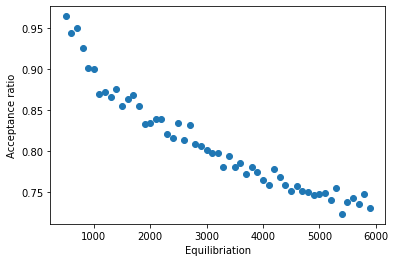

In [ ]:
print('\n\n')
import matplotlib.pyplot as plt
y = accuracy
x = Eq_steps
plt.scatter(x,y)
plt.ylabel('Acceptance ratio')
plt.xlabel('Equilibriation')
plt.show()

###From this plot of acceptance ratio Vs Equilibiration MC steps, in order to reach in range of 30 to 50% accetance ratio around 10,000 MC steps need to be taken for N = 100 particles

##(E) Plotting equation of state Pressure Vs $\rho$

In [ ]:
nCycles = 10
nCycles+=3500
#random.seed(10)
dr = 0.1
T = 2.0
Rho = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
l = list()
Pre = list()
N = 100

for i in range(len(Rho)):
  L = pow(N/Rho[i],1/3)
  l.append(L)

for j in range(len(Rho)):
  nAcc = 0.0
  esum = 0.0
  nSamp = 0.0
  vir_sum = 0.0 
  P = 0
  initialize(rx,ry,rz,N,l[j])
  for c in range(nCycles):
    i = random.randint(0,99)
    random.seed(c)
    dx = dr*(0.5-random.random())
    dy = dr*(0.5-random.random())
    dz = dr*(0.5-random.random())

    # Saving current positions :
    rxold = rx[i]
    ryold = ry[i]
    rzold = rz[i]

    # Displace a particle
    rx[i]+=dx
    ry[i]+=dy
    rz[i]+=dz

    # Apply periodic boundary conditions : 
    if (rx[i]>l[j]): 
      rx[i]-=l[j]
    if (rx[i]<0):
      rx[i]+=l[j]
    if (ry[i]>l[j]):
      ry[i]-=l[j]
    if (ry[i]<0):
      ry[i]+=l[j]
    if (rz[i]>l[j]):
      rz[i]-=l[j]
    if (rz[i]<0):
      rz[i]+=l[j]
    
    rc = l[j]/2
    rc2 = (l[j]*l[j])/4.0
    rr3 = pow(rc,-3)
    e_cor = 8*(math.pi)*Rho[j]*(pow(rr3,3)/9.0 - rr3/3.0)
    p_cor = (16/3.0)*(math.pi)*Rho[j]*Rho[j]*((2/3)*pow(rr3,3) - rr3)
    e_cut = 4.0*(pow(rr3,4) - pow(rr3,2))

    E_new,vir_new = total_energy(rx,ry,rz,N,l[j],rc2,tailcorr,e_cor,shift,e_cut)
    
    # Conditionally accept
    if (random.random() < math.exp(-T*(E_new - E_old))):
      E_old= E_new
      vir_old = vir_new
      nAcc+=1 
  # Or Reject the move 
    else :
      rx[i] = rxold
      ry[i] = ryold
      rz[i] = rzold
 
    if (c > nEq): 
      esum +=E_old
      vir_sum += vir_old
      nSamp+=1

  P = Rho[j]*T + (vir_sum/(pow(l[j],3)*nSamp)) + p_cor
  Pre.append(P)

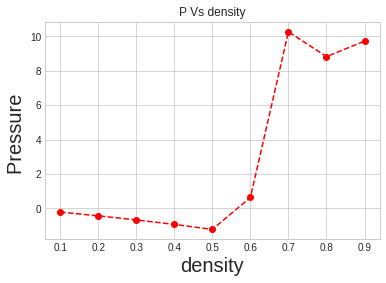

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.plot(Rho, Pre, 'ro--')
plt.xlabel("density",fontsize=20)
plt.ylabel("Pressure ",fontsize = 20)
plt.title("P Vs density")
plt.axis('tight')
plt.show()

In [ ]:
Pre

[-0.2115954053577296,
 -0.4312315721801809,
 -0.6669423990182048,
 -0.9267480585949086,
 -1.2186481348917857,
 0.6367070347656429,
 10.263738834124908,
 8.819414407998625,
 9.718026821774105]

##(F)  At $\rho$ = 0.6 and 0.8 computing pressure with N = 200 particles

In [ ]:
import math
import random

rho,T,N = 0.6, 2.0,200
nCycles,nEq,shift,short_out,tailcorr = 10,1000,1,0,1

# compute side length
L = pow(N/rho,0.33333)
rc = L/2.0

# compute tail corrections:
rr3 = pow(rc,-3)
e_cor = 8*(math.pi)*rho*(pow(rr3,3)/9.0 - rr3/3.0)
p_cor = (16/3.0)*(math.pi)*rho*rho*((2/3)*pow(rr3,3) - rr3)
e_cut = 4.0*(pow(rr3,4) - pow(rr3,2))
V = pow(L,3)
# squared cutoff 
rc2 = rc*rc
rx = list()
ry = list()
rz = list()

for i in range(N):
  rx.append(0)
  ry.append(0)
  rz.append(0)

initialize(rx,ry,rz,N,L)

E_old,vir = total_energy(rx,ry,rz,N,L,rc2,tailcorr,e_cor,shift,e_cut)

In [ ]:

Eq_steps = 13500
nCycles = 10
nCycles += Eq_steps
nAcc = 0.0
esum = 0.0
nSamp = 0.0
vir_sum = 0.0
for c in range(nCycles):
  i = random.randint(0,99)
  #random.seed(c)
  dx = dr*(0.5-random.random())
  dy = dr*(0.5-random.random())
  dz = dr*(0.5-random.random())

  # Saving current positions :
  rxold = rx[i]
  ryold = ry[i]
  rzold = rz[i]

  # Displace a particle
  rx[i]+=dx
  ry[i]+=dy
  rz[i]+=dz

  # Apply periodic boundary conditions : 
  if (rx[i]>L): 
    rx[i]-=L
  if (rx[i]<0):
    rx[i]+=L
  if (ry[i]>L):
    ry[i]-=L
  if (ry[i]<0):
    ry[i]+=L
  if (rz[i]>L):
    rz[i]-=L
  if (rz[i]<0):
    rz[i]+=L

  rc2 = (L*L)/4.0
  E_new,vir_new = total_energy(rx,ry,rz,N,L,rc2,tailcorr,e_cor,shift,e_cut)
  
  # Conditionally accept
  if (random.random() < math.exp(-T*(E_new - E_old))):
    E_old= E_new
    vir_old = vir_new
    nAcc+=1 
  # Or Reject the move 
  else :
    rx[i] = rxold
    ry[i] = ryold
    rz[i] = rzold
# start calculating energy after equilibration steps.
  if (c == Eq_steps):
    energy_mc.append(E_old)
    P = rho/T + vir_old/(3*V) 
    press_mc.append(P)
  #if (c > nEq): 
    #e_evol.append(E_old)
    #v_evol.append(rho*T + vir_old/(3*V))
    #esum +=E_old
    #vir_sum += vir_old
    #nSamp+=1

In [ ]:
print('Pressure for N = 200 :', P)

Acceptance ratio is for N = 200 : 1.1454589801934214


##P = 0.636 unit for N = 100  at $\rho = 0.6$
##P = 1.140 unit  for N = 200 at $\rho = 0.6$

In [ ]:
import math
import random

rho,T,N = 0.8, 2.0,200
nCycles,nEq,shift,short_out,tailcorr = 10,1000,1,0,1

# compute side length
L = pow(N/rho,0.33333)
rc = L/2.0

# compute tail corrections:
rr3 = pow(rc,-3)
e_cor = 8*(math.pi)*rho*(pow(rr3,3)/9.0 - rr3/3.0)
p_cor = (16/3.0)*(math.pi)*rho*rho*((2/3)*pow(rr3,3) - rr3)
e_cut = 4.0*(pow(rr3,4) - pow(rr3,2))
V = pow(L,3)
# squared cutoff 
rc2 = rc*rc
rx = list()
ry = list()
rz = list()

for i in range(N):
  rx.append(0)
  ry.append(0)
  rz.append(0)

initialize(rx,ry,rz,N,L)

E_old,vir = total_energy(rx,ry,rz,N,L,rc2,tailcorr,e_cor,shift,e_cut)

In [ ]:
Eq_steps = 20000
nCycles = 10
nCycles += Eq_steps
nAcc = 0.0
esum = 0.0
nSamp = 0.0
vir_sum = 0.0
for c in range(nCycles):
  i = random.randint(0,99)
  #random.seed(c)
  dx = dr*(0.5-random.random())
  dy = dr*(0.5-random.random())
  dz = dr*(0.5-random.random())

  # Saving current positions :
  rxold = rx[i]
  ryold = ry[i]
  rzold = rz[i]

  # Displace a particle
  rx[i]+=dx
  ry[i]+=dy
  rz[i]+=dz

  # Apply periodic boundary conditions : 
  if (rx[i]>L): 
    rx[i]-=L
  if (rx[i]<0):
    rx[i]+=L
  if (ry[i]>L):
    ry[i]-=L
  if (ry[i]<0):
    ry[i]+=L
  if (rz[i]>L):
    rz[i]-=L
  if (rz[i]<0):
    rz[i]+=L

  rc2 = (L*L)/4.0
  E_new,vir_new = total_energy(rx,ry,rz,N,L,rc2,tailcorr,e_cor,shift,e_cut)
  
  # Conditionally accept
  if (random.random() < math.exp(-T*(E_new - E_old))):
    E_old= E_new
    vir_old = vir_new
    nAcc+=1 
  # Or Reject the move 
  else :
    rx[i] = rxold
    ry[i] = ryold
    rz[i] = rzold
# start calculating energy after equilibration steps.
  if (c == Eq_steps):
    energy_mc.append(E_old)
    P = rho/T + vir_old/(3*V) 
    press_mc.append(P)
  #if (c > nEq): 
    #e_evol.append(E_old)
    #v_evol.append(rho*T + vir_old/(3*V))
    #esum +=E_old
    #vir_sum += vir_old
    #nSamp+=1

##P = 8.81 unit for N = 100  at $\rho = 0.8$
##P = 1.37 unit for N = 200 at $\rho = 0.8$

In [ ]:
P

1.3729108068423705

### Understanding from the Project:
### In this project, We first start with perfect crystal lattice configuration and then by using MC moves of configurations we attain lowest energy configuration. This simulation helps in understanding the phase change behaviour of fluids at different temperatures. As we know from basic chemistry knowledge that gas can be liquified only below its critical temperature, we can explain that phenemena theoretically using this model. 

### The Results that I have obtained is not similar that from Frenkel & Smith book that is because to high acccetance ratio I have used in simulation box. From the acceptance ration vs Mc moves plots, we can say that more that 10000 MC moves are needed to get 30 to 50% acceptance ratio while for particle N = 200, it is even higher. 

### Out of system at  N=100 and N=200, In initial state orderness is same in both system (because of perfect cubic lattice) but in ground state configuration N =200 system is more disordered than N = 100


In [ ]:
print('final positions of particles (disordered State)')
import plotly.express as px
fig = px.scatter_3d(x=rx, y=ry, z=rz)
fig.show()

final positions of particles (disordered State)


## From configuration of the N = 200 system, we can say that system has not reached to its ground state yet and more number of MC steps are still needed to reach ground state. 